<a href="https://colab.research.google.com/github/LiFeLeSS5858/ABD/blob/main/DZ4_Class_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Построить дерево решений и ансамбль деревьев для датасета цветков ириса, подобрав наилучшие гиперпараметры
Сравнить полученные результаты (проверить на новых сгенерированных данных и оценить accuracy)
Визуализировать результаты

In [4]:
import pandas as pd
#from pandas import df

df = pd.DataFrame(data.data)
# Делаем имена колонок такие же, как имена переменных:
df.columns = data.feature_names
# Добавляем столбец с целевой переменной: 
df['target'] = data.target
# Для наглядности добавляем столбец с сортами: 
df['name'] = df.target.apply(lambda x : data.target_names[x])
# Смотрим, что получилось:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df = df.drop('target', axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   name               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = df.drop('name', axis=1)
Y = df.name

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

DecisionTreeClassifier(max_depth=2, random_state=13)

In [12]:
try:
  first_tree.fit(X_train, Y_train)
except Exception as e:
  print(e)

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, filled=True)

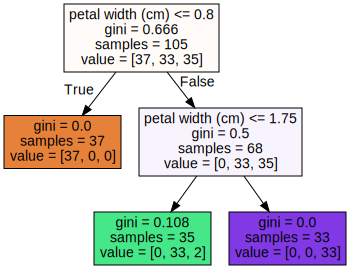

In [14]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [15]:
from sklearn.tree import export_text

tree_rules = export_text(first_tree, feature_names=list(X.columns))
print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: versicolor
|   |--- petal width (cm) >  1.75
|   |   |--- class: virginica



In [16]:
list(set(df['name']))

['virginica', 'setosa', 'versicolor']

In [17]:
prediction = first_tree.predict(X_test)
prediction

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, prediction)

0.9111111111111111

## RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
list(df.columns[:-1])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

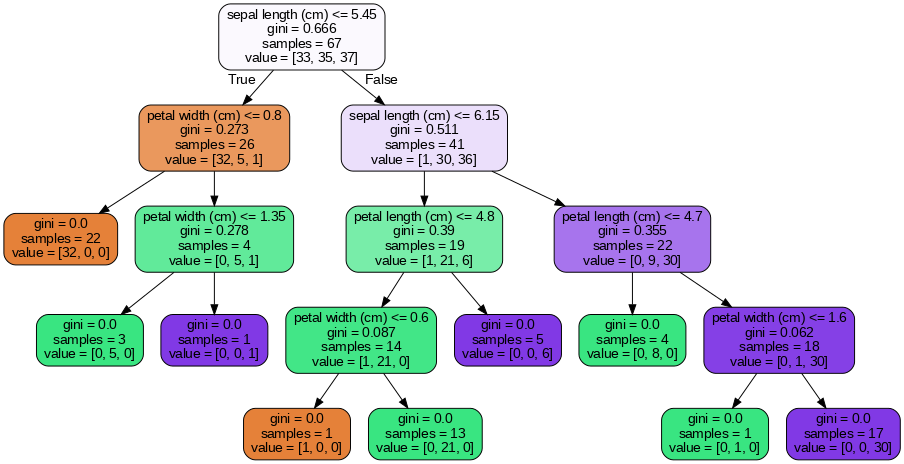

In [22]:
from sklearn.tree import export_graphviz

for tree_in_forest in RFC.estimators_:
  export_graphviz(
      tree_in_forest,
      out_file='/content/tree.dot',
      feature_names=X_train.columns,
      rounded=True,
      filled=True,
      proportion=False
  )
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RFC_tree.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'RFC_tree.png')

In [23]:
RFC.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1684164701),
 DecisionTreeClassifier(max_features='sqrt', random_state=1672380965),
 DecisionTreeClassifier(max_features='sqrt', random_state=975471677),
 DecisionTreeClassifier(max_features='sqrt', random_state=1159303362),
 DecisionTreeClassifier(max_features='sqrt', random_state=1726194927),
 DecisionTreeClassifier(max_features='sqrt', random_state=192413304),
 DecisionTreeClassifier(max_features='sqrt', random_state=1144501298),
 DecisionTreeClassifier(max_features='sqrt', random_state=180718772),
 DecisionTreeClassifier(max_features='sqrt', random_state=2083925934),
 DecisionTreeClassifier(max_features='sqrt', random_state=899205542),
 DecisionTreeClassifier(max_features='sqrt', random_state=991232953),
 DecisionTreeClassifier(max_features='sqrt', random_state=1180179255),
 DecisionTreeClassifier(max_features='sqrt', random_state=2081435425),
 DecisionTreeClassifier(max_features='sqrt', random_state=963963063),
 DecisionTre

In [24]:
from sklearn.tree import export_text

tree_rules = export_text(RFC.estimators_[0], feature_names=list(X.columns))
print(tree_rules)

|--- sepal length (cm) <= 5.45
|   |--- sepal width (cm) <= 2.85
|   |   |--- petal length (cm) <= 4.20
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.20
|   |   |   |--- class: 2.0
|   |--- sepal width (cm) >  2.85
|   |   |--- class: 0.0
|--- sepal length (cm) >  5.45
|   |--- sepal length (cm) <= 6.35
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- petal length (cm) <= 2.35
|   |   |   |   |--- class: 0.0
|   |   |   |--- petal length (cm) >  2.35
|   |   |   |   |--- class: 1.0
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2.0
|   |--- sepal length (cm) >  6.35
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: 2.0



In [25]:
prediction = RFC.predict(X_test)
prediction

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica'], dtype=object)

In [26]:
accuracy_score(Y_test, prediction)

0.9333333333333333

## Важность колонок

In [27]:
important_columns = pd.Series(data=RFC.feature_importances_, index=X_train.columns)

important_columns.sort_values(ascending=False, inplace=False)

petal width (cm)     0.471677
petal length (cm)    0.378343
sepal length (cm)    0.128269
sepal width (cm)     0.021711
dtype: float64

## Подбор гиперпараметров

In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np

depths = np.arange(1, 21)
features = [.25, .5, .7, 1]  # Количество признаков, которые следует учитывать при поиске наилучшего разделения
samples_leaf = list(range(5, 100, 10))  # Минимальное количество образцов, допустимое в листе

tree_params = {'criterion':['gini','entropy'], 'max_depth': depths,  'max_features': features, 'min_samples_leaf': samples_leaf}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3, n_jobs=-1)
tree_grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_features': [0.25, 0.5, 0.7, 1],
                         'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95]})

In [29]:
tree_grid.fit(X_train, Y_train)
print(tree_grid.best_score_, tree_grid.best_params_)

0.9714285714285714 {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 15}


In [30]:
tree_bp = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=0.7, min_samples_leaf=5)
tree_bp.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.7, min_samples_leaf=5)

In [31]:
list(set(df['name']))

['virginica', 'setosa', 'versicolor']

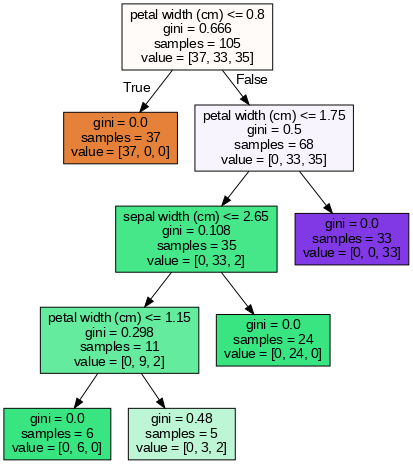

In [32]:
export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, filled=True, proportion=False)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_bp.dot', '-o', 'tree_bp.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_bp.png')

In [33]:
from sklearn.tree import export_text

tree_rules = export_text(tree_bp, feature_names=list(X.columns))
print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- sepal width (cm) <= 2.65
|   |   |   |--- petal width (cm) <= 1.15
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal width (cm) >  1.15
|   |   |   |   |--- class: versicolor
|   |   |--- sepal width (cm) >  2.65
|   |   |   |--- class: versicolor
|   |--- petal width (cm) >  1.75
|   |   |--- class: virginica



In [34]:
prediction = tree_bp.predict(X_test)
prediction

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica'], dtype=object)

In [35]:
accuracy_score(Y_test, prediction)

0.9111111111111111

## Проверка обученной модели на конкретном примере

In [36]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [37]:
{col:0 for col in X_train.columns}

{'sepal length (cm)': 0,
 'sepal width (cm)': 0,
 'petal length (cm)': 0,
 'petal width (cm)': 0}

In [38]:
example = {'sepal length (cm)': 5.7,
 'sepal width (cm)': 2.6,
 'petal length (cm)': 4.9,
 'petal width (cm)': 1.7}

In [39]:
example_df = pd.DataFrame(data=[example])
example_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.7,2.6,4.9,1.7


## first_tree

In [40]:
first_tree.predict(example_df)

array(['versicolor'], dtype=object)

In [41]:
probability = pd.Series(data=first_tree.predict_proba(example_df)[0], index=first_tree.classes_)
probability.sort_values(ascending=False)

versicolor    0.942857
virginica     0.057143
setosa        0.000000
dtype: float64

## tree_bp

In [42]:
tree_bp.predict(example_df)

array(['versicolor'], dtype=object)

In [43]:
tree_bp.predict_proba(example_df)[0]

array([0. , 0.6, 0.4])

In [44]:
tree_bp.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
probability = pd.Series(data=tree_bp.predict_proba(example_df)[0], index=tree_bp.classes_)
probability.sort_values(ascending=False)

versicolor    0.6
virginica     0.4
setosa        0.0
dtype: float64

## RFC

In [46]:
RFC.predict(example_df)

array(['virginica'], dtype=object)

In [47]:
probability = pd.Series(data=RFC.predict_proba(example_df)[0], index=RFC.classes_)
probability.sort_values(ascending=False)

virginica     0.6
versicolor    0.4
setosa        0.0
dtype: float64